In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
import warnings

plt.style.use('ggplot')
np.random.seed(37)
warnings.filterwarnings('ignore')

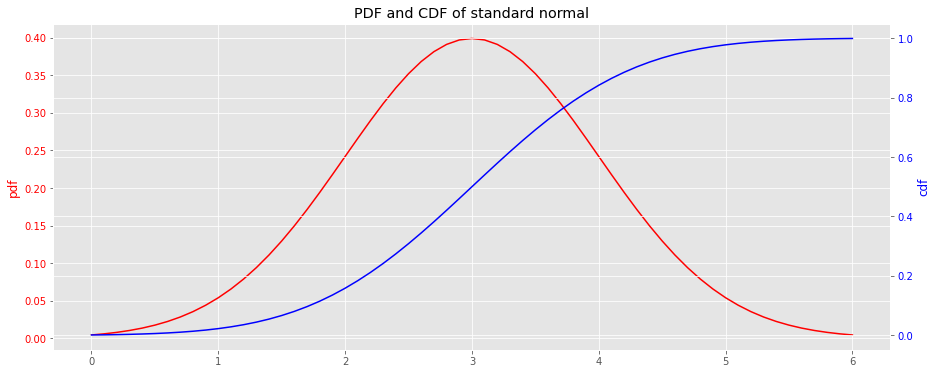

In [11]:
x = np.arange(0, 6.1, 0.1)
y_pdf = norm.pdf(x, loc=3.0, scale=1.0)
y_cdf = norm.cdf(x, loc=3.0, scale=1.0)

fig, ax = plt.subplots(figsize=(15, 6))

ax = [ax, ax.twinx()]

_ = ax[0].plot(x, y_pdf, label='pdf', color='r')
_ = ax[1].plot(x, y_cdf, label='cdf', color='b')

_ = ax[0].tick_params(axis='y', labelcolor='r')
_ = ax[1].tick_params(axis='y', labelcolor='b')

_ = ax[0].set_ylabel('pdf', color='r')
_ = ax[1].set_ylabel('cdf', color='b')

_ = ax[0].set_title('PDF and CDF of standard normal')

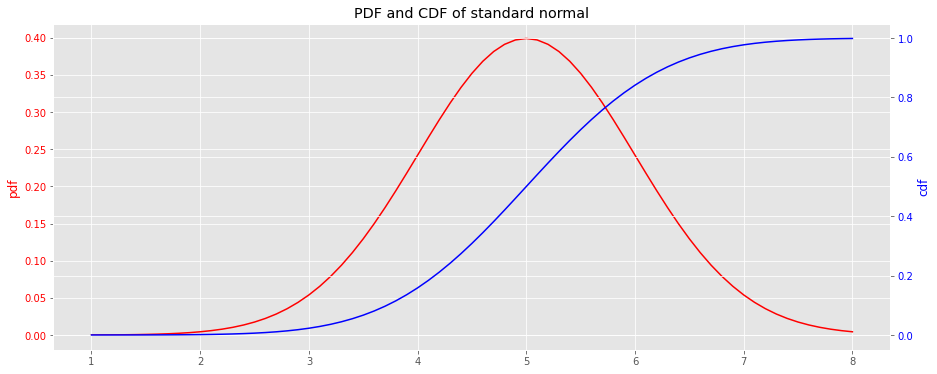

In [14]:
x = np.arange(1.0, 8.1, 0.1)
y_pdf = norm.pdf(x, loc=5.0, scale=1.0)
y_cdf = norm.cdf(x, loc=5.0, scale=1.0)

fig, ax = plt.subplots(figsize=(15, 6))

ax = [ax, ax.twinx()]

_ = ax[0].plot(x, y_pdf, label='pdf', color='r')
_ = ax[1].plot(x, y_cdf, label='cdf', color='b')

_ = ax[0].tick_params(axis='y', labelcolor='r')
_ = ax[1].tick_params(axis='y', labelcolor='b')

_ = ax[0].set_ylabel('pdf', color='r')
_ = ax[1].set_ylabel('cdf', color='b')

_ = ax[0].set_title('PDF and CDF of standard normal')

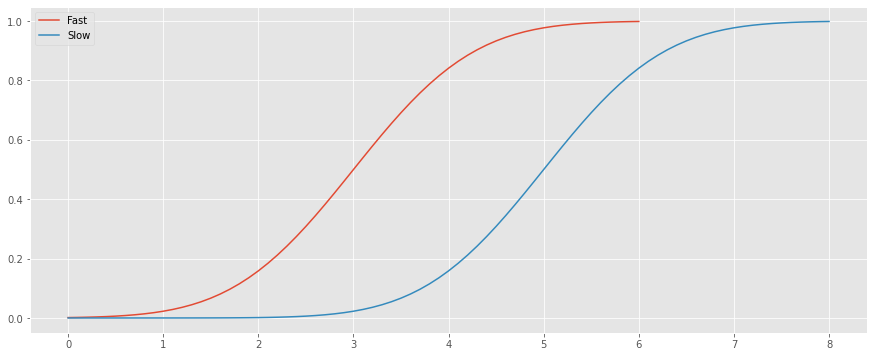

In [21]:
x1 = np.arange(0, 6.1, 0.1)
y1_pdf = norm.pdf(x1, loc=3.0, scale=1.0)
y1_cdf = norm.cdf(x1, loc=3.0, scale=1.0)

x2 = np.arange(0.0, 8.1, 0.1)
y2_pdf = norm.pdf(x2, loc=5.0, scale=1.0)
y2_cdf = norm.cdf(x2, loc=5.0, scale=1.0)

fig, ax = plt.subplots(figsize=(15, 6))

_ = ax.plot(x1, y1_cdf, label='Fast')
_ = ax.plot(x2, y2_cdf, label='Slow')
_ = ax.legend()

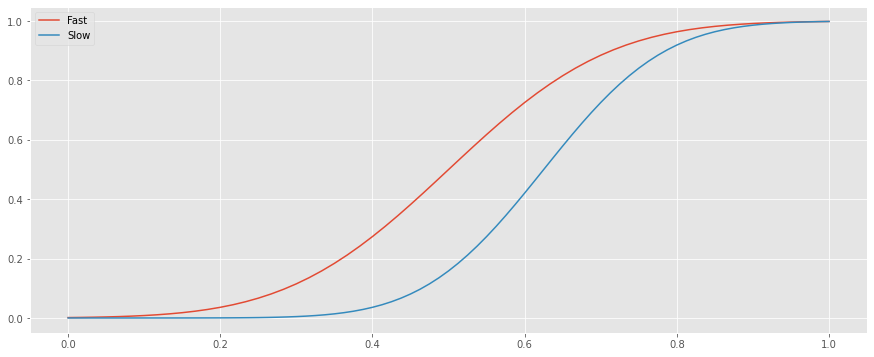

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))

x1_cdf = x1 / np.max(x1)
x2_cdf = x2 / np.max(x2)

_ = ax.plot(x1_cdf, y1_cdf, label='Fast')
_ = ax.plot(x2_cdf, y2_cdf, label='Slow')
_ = ax.legend()

In [36]:
from scipy.optimize import curve_fit

def logistic(x, L=1, x_0=0, k=1):
    return L / (1 + np.exp(-k * (x - x_0)))

L_estimate = y1_cdf.max()
x_0_estimate = np.median(x1)
k_estimate = 1.0
p_0 = [L_estimate, x_0_estimate, k_estimate]

popt1, pcov1 = curve_fit(logistic, x1_cdf, y1_cdf, p_0, method='dogbox')

L_estimate = y2_cdf.max()
x_0_estimate = np.median(x2)
k_estimate = 1.0
p_0 = [L_estimate, x_0_estimate, k_estimate]

popt2, pcov2 = curve_fit(logistic, x2_cdf, y2_cdf, p_0, method='dogbox')

In [37]:
popt1

array([ 1.00892835,  0.50262806, 10.01091039])

In [38]:
popt2

array([ 1.00883279,  0.62695644, 13.35580491])

In [39]:
pcov1

array([[ 3.94517551e-06,  1.15739082e-06, -8.46096771e-05],
       [ 1.15739082e-06,  7.13993122e-07, -2.48235630e-05],
       [-8.46096771e-05, -2.48235630e-05,  4.74565863e-03]])

In [40]:
pcov2

array([[ 3.03785530e-06,  6.68342246e-07, -8.67539304e-05],
       [ 6.68342246e-07,  3.09496873e-07, -1.91009166e-05],
       [-8.67539304e-05, -1.91009166e-05,  6.49598840e-03]])

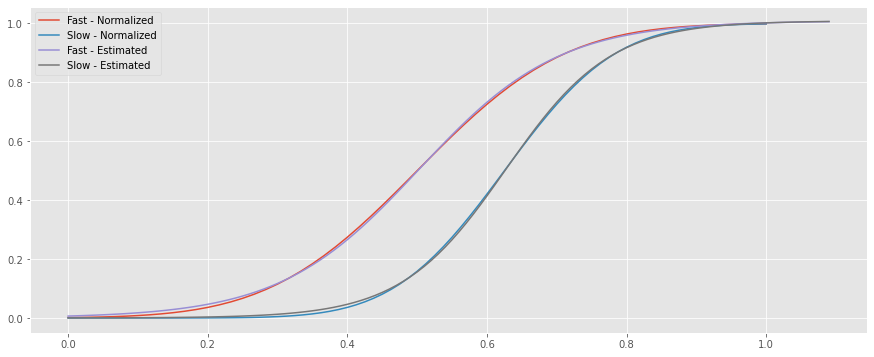

In [60]:
x = np.arange(0, 1.1, 0.01)
y1 = logistic(x, L=popt1[0], x_0=popt1[1], k=popt1[2])
y2 = logistic(x, L=popt2[0], x_0=popt2[1], k=popt2[2])

fig, ax = plt.subplots(figsize=(15, 6))

_ = ax.plot(x1_cdf, y1_cdf, label='Fast - Normalized')
_ = ax.plot(x2_cdf, y2_cdf, label='Slow - Normalized')
_ = ax.plot(x, y1, label='Fast - Estimated')
_ = ax.plot(x, y2, label='Slow - Estimated')
_ = ax.legend()

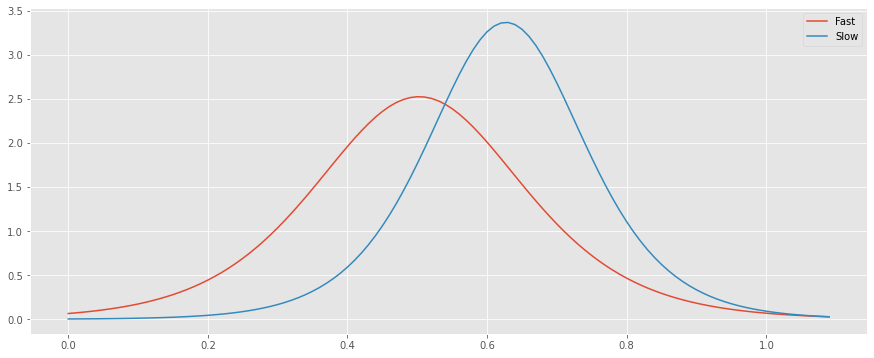

In [62]:
from scipy.misc import derivative

cdf1 = lambda x: logistic(x, L=popt1[0], x_0=popt1[1], k=popt1[2])
cdf2 = lambda x: logistic(x, L=popt2[0], x_0=popt2[1], k=popt2[2])

y1_pdf = derivative(cdf1, x, dx=1e-6)
y2_pdf = derivative(cdf2, x, dx=1e-6)

fig, ax = plt.subplots(figsize=(15, 6))

_ = ax.plot(x, y1_pdf, label='Fast')
_ = ax.plot(x, y2_pdf, label='Slow')
_ = ax.legend()

In [63]:
y1_pdf.mean()

0.9091200003790176

In [64]:
y1_pdf.std()

0.8469378251158682

In [65]:
y2_pdf.mean()

0.9151590119511979

In [66]:
y2_pdf.std()

1.1054292261215986

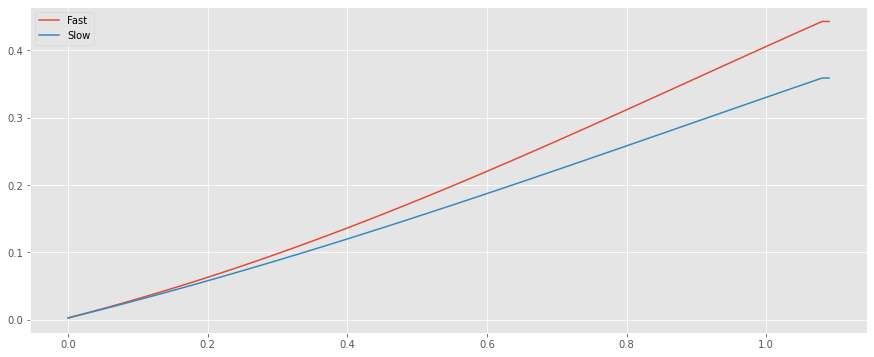

In [80]:
from scipy.integrate import quad

x1_mean = y1_pdf.mean()
x2_mean = y2_pdf.mean()

x1_std = y1_pdf.std()
x2_std = y2_pdf.std()

norm1 = lambda x: norm.pdf(x, loc=x1_mean, scale=x1_std)
norm2 = lambda x: norm.pdf(x, loc=x2_mean, scale=x2_std)

pdf1 = np.array([tup[0] for tup in [quad(norm1, a, b) for a, b in [(a, b) for a, b in zip(x, x[1:len(x)])]]] + [0]).cumsum()
pdf2 = np.array([tup[0] for tup in [quad(norm2, a, b) for a, b in [(a, b) for a, b in zip(x, x[1:len(x)])]]] + [0]).cumsum()

fig, ax = plt.subplots(figsize=(15, 6))

_ = ax.plot(x, pdf1, label='Fast')
_ = ax.plot(x, pdf2, label='Slow')
_ = ax.legend()